In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
test_df=pd.read_csv('test.csv')

In [5]:
test_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
train_df.groupby('Personality')['Personality'].count()

Personality
Extrovert    13699
Introvert     4825
Name: Personality, dtype: int64

In [9]:
train_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


### Missing Values

In [10]:
# Checking for missing values
train_df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [11]:
# Delete the rows or data point to handle missing values
train_df.shape

(18524, 9)

In [12]:
 train_df.dropna().shape

(10189, 9)

* As we can see that on droping the rows or data point containing the NULL values, almost 40% data were lost. So, we don't prefer this method of removing the missing values.
* And also we cannot do this for columns for the same reason.

## Imputation of Missing Values
### 1. Mean/Median/Mode Value Imputation

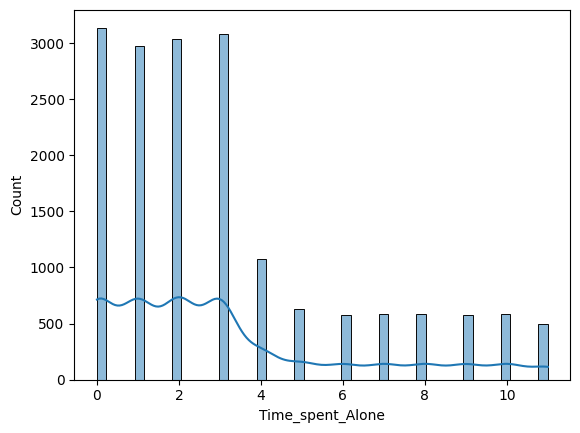

In [13]:
sns.histplot(train_df['Time_spent_Alone'],kde=True);

**Observation**: As the data point for Time_spent_Alone is right skewed so it might contains outliers. So, the best imputation method we can use here is `Median Value Imputaion`

In [14]:
print(train_df['Time_spent_Alone'].mean())
print(train_df['Time_spent_Alone'].median())

3.1377639321564557
2.0


In [15]:
train_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\3044033248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)


In [16]:
train_df.isnull().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

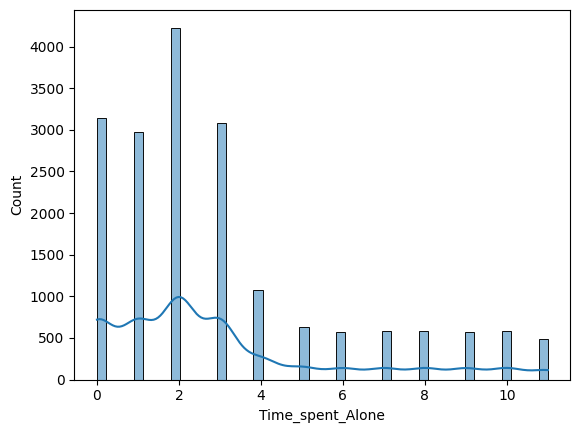

In [17]:
sns.histplot(train_df['Time_spent_Alone'],kde=True);

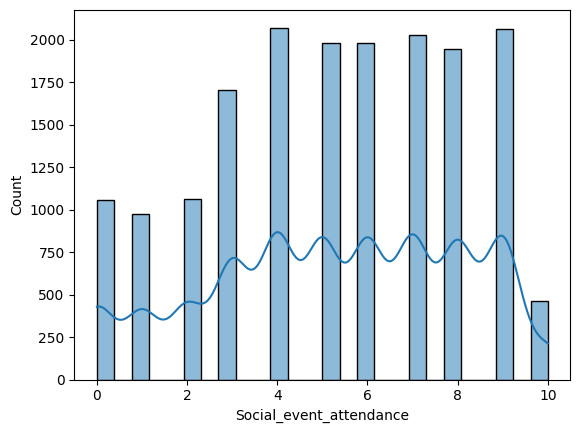

In [18]:
sns.histplot(train_df['Social_event_attendance'],kde=True);

**Observation**:  As there is no extreme skeweness is visible and the it is numerical value we can use `Mean Value Imputation`

In [19]:
train_df["Social_event_attendance"].fillna(round(train_df["Social_event_attendance"].mean()), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\2694732446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Social_event_attendance"].fillna(round(train_df["Social_event_attendance"].mean()), inplace=True)


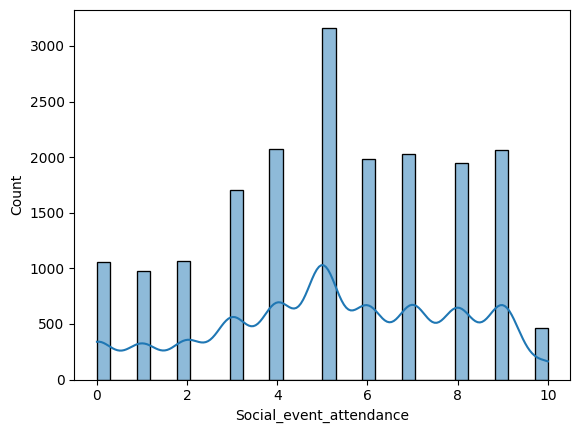

In [20]:
sns.histplot(train_df['Social_event_attendance'],kde=True);

In [21]:
train_df.isnull().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [22]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


<Axes: xlabel='Going_outside', ylabel='Count'>

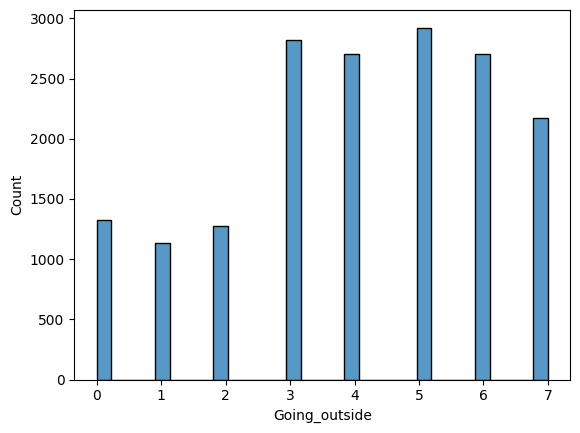

In [23]:
sns.histplot(train_df['Going_outside'])

**Observation**: It is some what left skewed and is numerical values. So, we have to use `Median Value Imputation`

In [24]:
train_df['Going_outside']=train_df['Going_outside'].fillna(train_df['Going_outside'].median())

<Axes: xlabel='Going_outside', ylabel='Count'>

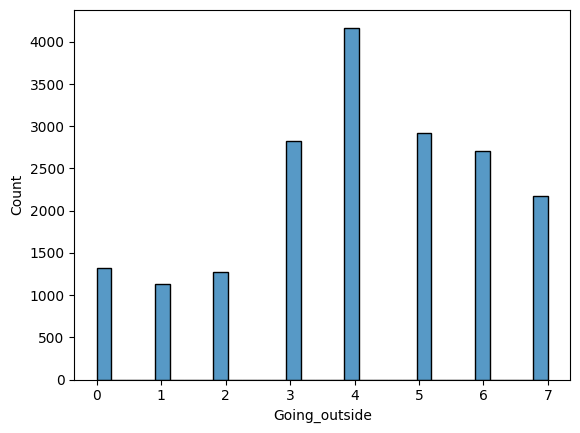

In [25]:
sns.histplot(train_df['Going_outside'])

In [26]:
train_df.isnull().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                   0
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

<Axes: xlabel='Friends_circle_size', ylabel='Count'>

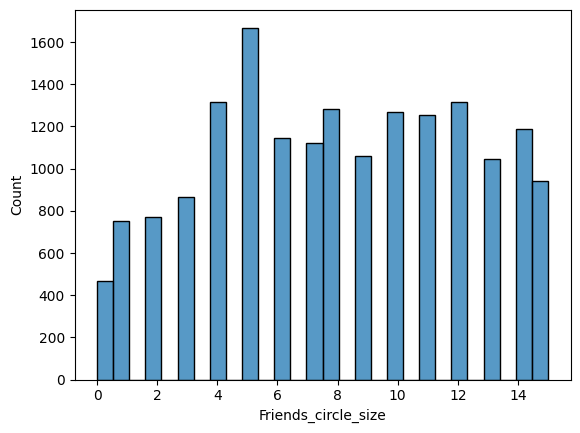

In [27]:
sns.histplot(train_df['Friends_circle_size'])

**Observation**: The given data is almost normally distributed and numerial type. So, we can use `Mean Value Imputaion`

In [28]:
train_df["Friends_circle_size"]=train_df["Friends_circle_size"].fillna(round(train_df["Friends_circle_size"].mean()))

<Axes: xlabel='Friends_circle_size', ylabel='Count'>

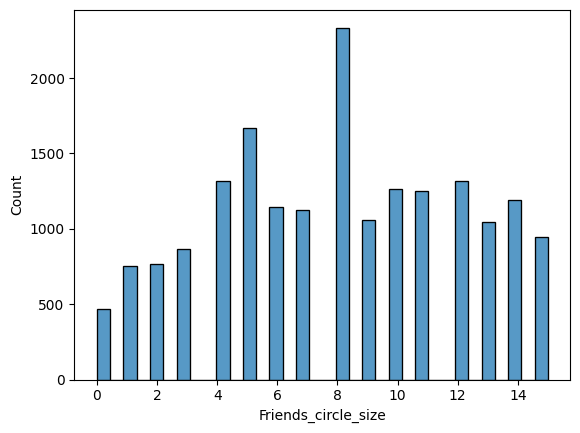

In [29]:
sns.histplot(train_df['Friends_circle_size'])

In [30]:
train_df.isnull().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                   0
Drained_after_socializing    1149
Friends_circle_size             0
Post_frequency               1264
Personality                     0
dtype: int64

<Axes: xlabel='Post_frequency', ylabel='Count'>

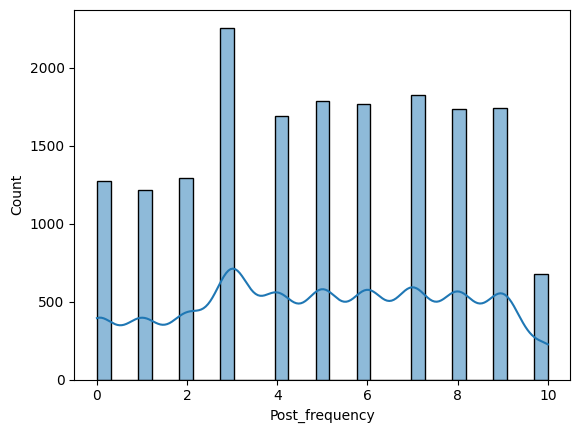

In [31]:
sns.histplot(train_df['Post_frequency'],kde=True)

In [32]:
train_df["Post_frequency"]=train_df["Post_frequency"].fillna(train_df["Post_frequency"].median())

<Axes: xlabel='Post_frequency', ylabel='Count'>

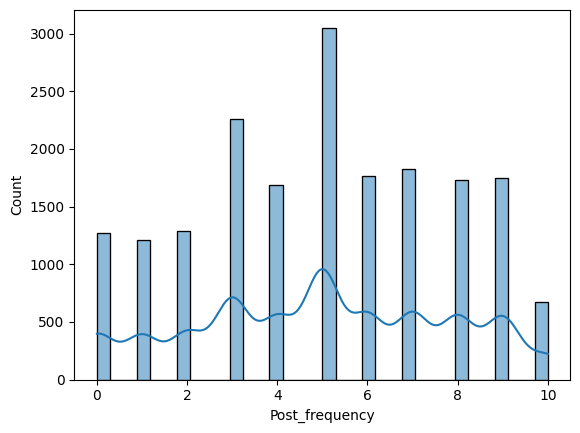

In [33]:
sns.histplot(train_df["Post_frequency"],kde=True)

Now we can do imputation for categorical data.

In [34]:
train_df.isnull().sum()

id                              0
Time_spent_Alone                0
Stage_fear                   1893
Social_event_attendance         0
Going_outside                   0
Drained_after_socializing    1149
Friends_circle_size             0
Post_frequency                  0
Personality                     0
dtype: int64

In [35]:
mode_value=train_df[train_df['Stage_fear'].notna()]['Stage_fear'].mode()[0]

In [36]:
train_df['Stage_fear']=train_df['Stage_fear'].fillna(mode_value)

In [37]:
train_df['Stage_fear'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
mode_value=train_df[train_df['Drained_after_socializing'].notna()]['Drained_after_socializing'].mode()[0]
train_df['Drained_after_socializing']=train_df['Drained_after_socializing'].fillna(mode_value)

In [39]:
train_df['Drained_after_socializing'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
train_df["Drained_after_socializing"].isnull().sum()

0

In [41]:
train_df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [42]:
train_df.to_csv('train_df_cleaned', index=False)

In [43]:
df=pd.read_csv('train_df_cleaned')

In [44]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,No,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,5.0,Introvert
18522,18522,2.0,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [46]:
df['Personality'].value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

Using SMOTE method for balancing the dataset.

We could have used resampling method like Upsampling and Downsampling but they are not effective bcz the variance does not change. That's why we have to use SMOTE method by interploating the data points for the minority.

<Axes: xlabel='Time_spent_Alone', ylabel='Post_frequency'>

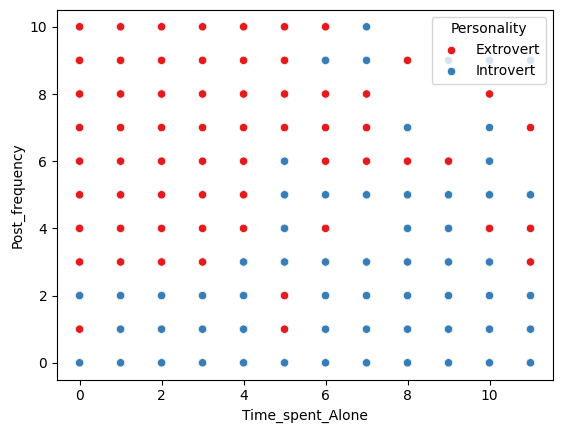

In [47]:
sns.scatterplot(
    data=df,
    x='Time_spent_Alone',
    y='Post_frequency',
    hue='Personality',   # Color by Personality (e.g., Introvert/Extrovert)
    palette='Set1'       # Use a distinct color palette
)


In [48]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

🧭 FULL PROJECT ROADMAP
We’ll follow this exact structure:

📂 Load Data

📊 Basic EDA

🧹 Data Cleaning

🔠 Encoding Categorical Features

📈 Feature Exploration & Visualization

⚖️ Class Balance Check

🧠 Feature Engineering

📊 Correlation Matrix

✂️ Train-Test Split

⚙️ Model Training

✅ Model Evaluation

🔁 Improve with Balancing or Hyperparameter Tuning

📤 Test Set Prediction & Submission

In [51]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (18524, 9)
Test shape: (6175, 8)


In [52]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


As we can see there are some missing values so, lets first check for the missing values

In [53]:
train_df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

## Handle the Missing Values by Imputation

In [54]:
type(train_df["Stage_fear"])

pandas.core.series.Series

In [55]:
print(train_df['Stage_fear'].mode()[0])
print(type(train_df['Stage_fear'].mode()[0]))


No
<class 'str'>


In [56]:
#  For categorical columns
train_df['Stage_fear'].fillna(train_df['Stage_fear'].mode()[0], inplace=True)
train_df['Drained_after_socializing'].fillna(train_df['Drained_after_socializing'].mode()[0], inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\1048118432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Stage_fear'].fillna(train_df['Stage_fear'].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\1048118432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [57]:
# For numerical Columns
num_cols=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']
for col in num_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\812049191.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)


In [58]:
train_df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [59]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert


In [60]:
## Encoding the Categorical columns 
## YES-1 and NO-0
## Extrovert-0 and Introvert-1

train_df['Stage_fear']=train_df['Stage_fear'].map({'Yes':1, 'No':0})
train_df['Drained_after_socializing']=train_df['Drained_after_socializing'].map({'Yes':1, 'No':0})

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train_df['Personality_encoded']=le.fit_transform(train_df['Personality'])

In [61]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_encoded
0,0,0.0,0,6.0,4.0,0,15.0,5.0,Extrovert,0
1,1,1.0,0,7.0,3.0,0,10.0,8.0,Extrovert,0
2,2,6.0,1,1.0,0.0,0,3.0,0.0,Introvert,1
3,3,3.0,0,7.0,3.0,0,11.0,5.0,Extrovert,0
4,4,1.0,0,4.0,4.0,0,13.0,5.0,Extrovert,0


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                    'Friends_circle_size', 'Post_frequency']


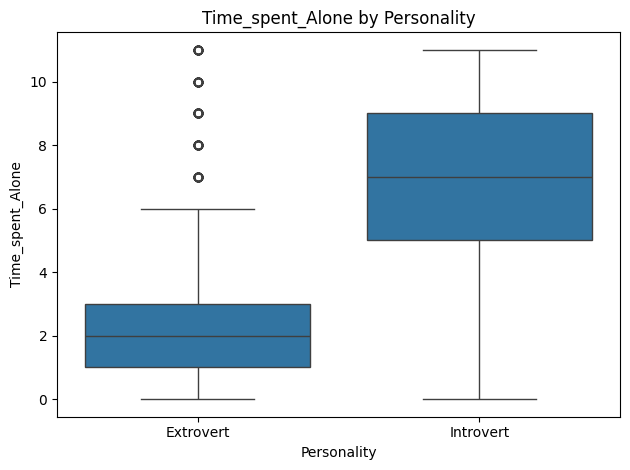

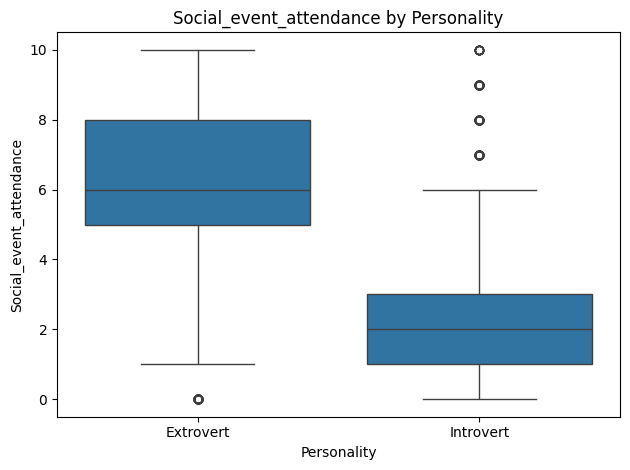

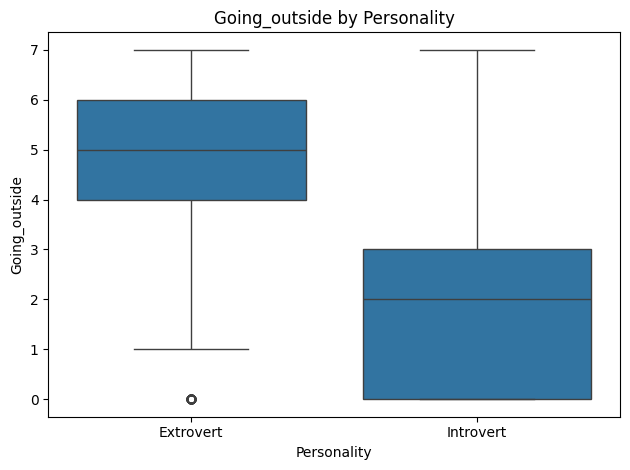

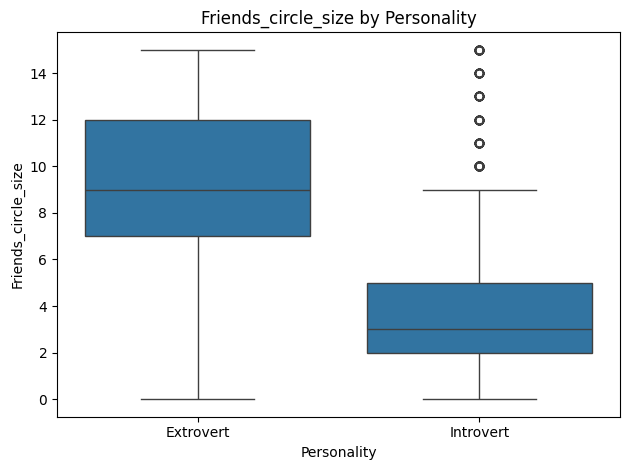

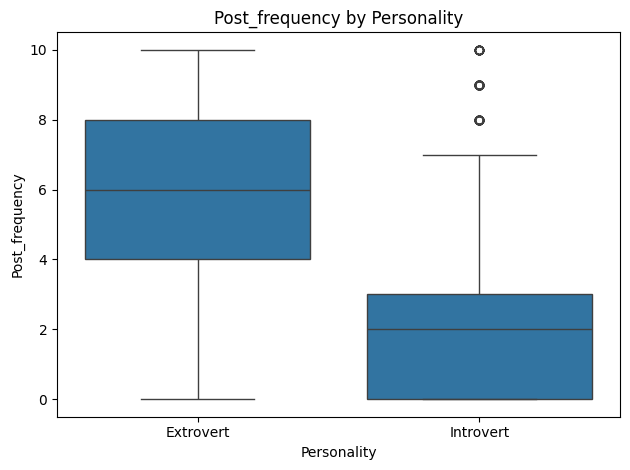

In [64]:
## Box plot of each feature vs Personlity
for col in numeric_features:
    sns.boxplot(data=train_df, x='Personality', y=col)
    plt.title(f'{col} by Personality')
    plt.tight_layout()
    plt.show()

**Observations**:
1. Introverts generally spend more time alone than extroverts.
2. Extroverts go to more events on average.
3. Extroverts tend to go outside more frequently.
4. Extroverts clearly have a larger friend circle on average.
5. Extroverts are more active on social media.

In [65]:
# Check class balance
print(train_df['Personality'].value_counts())
print("\nProportion:\n", train_df['Personality'].value_counts(normalize=True))


Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

Proportion:
 Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64


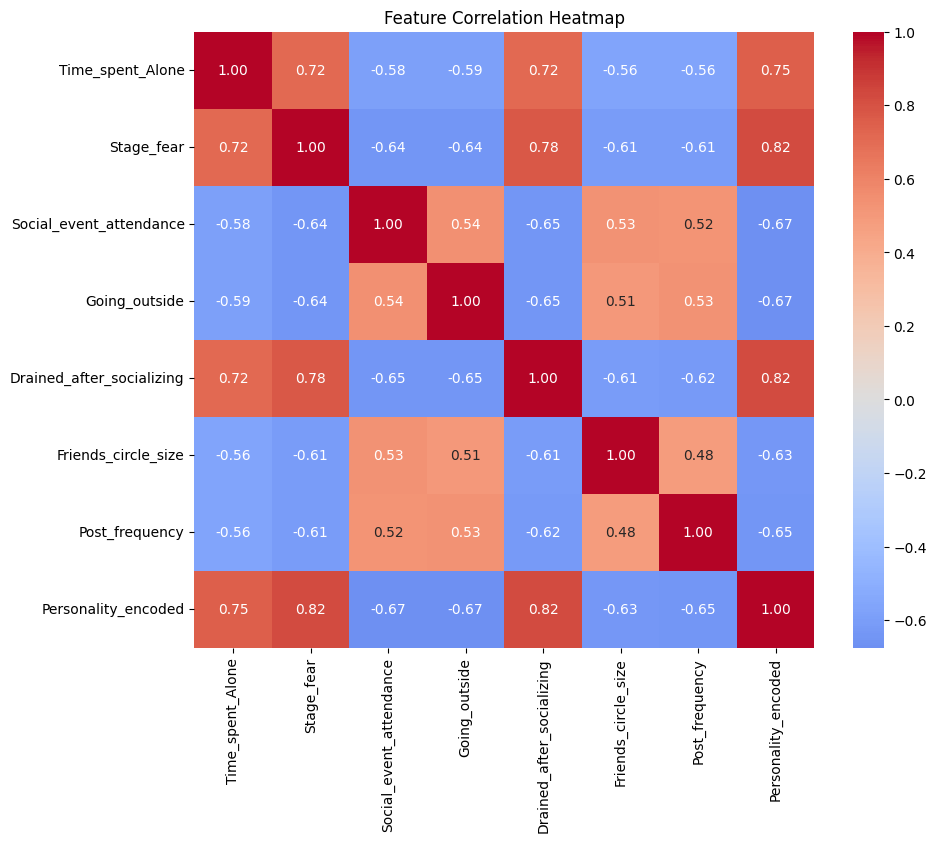

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train_df.drop(columns=['id', 'Personality']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Observation**: We can't drop any features because all the features have good correlation factor.

We'll now split our dataset.

In [67]:
from sklearn.model_selection import train_test_split

# Drop columns we don't want to use for modeling
features = train_df.drop(columns=['id','Personality','Personality_encoded'])
target = train_df["Personality_encoded"]

# 80% trainig, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Train Shape:",X_train.shape)
print("Validation shape:", X_val.shape)

Train Shape: (14819, 7)
Validation shape: (3705, 7)


In [68]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
print("After SMOTE:\n", y_train_balanced.value_counts())

After SMOTE:
 Personality_encoded
1    10959
0    10959
Name: count, dtype: int64


## Modeling

Accuracy: 0.9711201079622133

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



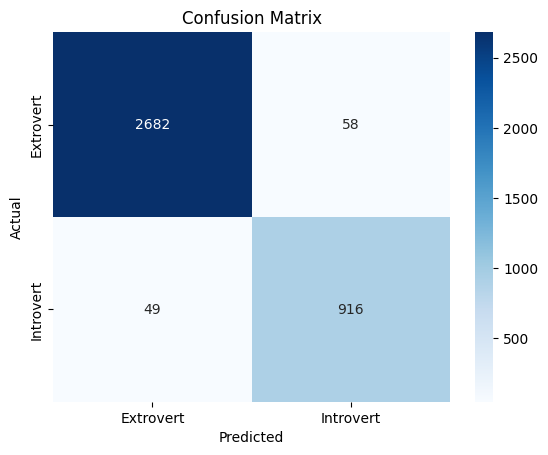

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Train the model on balanced training data
lr=LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_balanced, y_train_balanced)

## make predictions on the untouched validation set
y_pred = lr.predict(X_val)

## Evaluate Performance
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

## Plot confusion matrix
cm= confusion_matrix(y_val,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Extrovert", "Introvert"],
            yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models={
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results=[]

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred=model.predict(X_val)
    acc= accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (Introvert)": round(report['1']['precision'], 4),
        "Recall (Introvert)": round(report['1']['recall'], 4),
        "F1-score (Introvert)": round(report['1']['f1-score'], 4),
        "Precision (Extrovert)": round(report['0']['precision'], 4),
        "Recall (Extrovert)": round(report['0']['recall'], 4),
        "F1-score (Extrovert)": round(report['0']['f1-score'], 4)
    })

In [71]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy,Precision (Introvert),Recall (Introvert),F1-score (Introvert),Precision (Extrovert),Recall (Extrovert),F1-score (Extrovert)
2,SVM,0.9717,0.9406,0.9513,0.9459,0.9828,0.9788,0.9808
0,Logistic Regression,0.9711,0.9405,0.9492,0.9448,0.9821,0.9788,0.9804
3,Naive Bayes,0.9711,0.9395,0.9503,0.9449,0.9824,0.9785,0.9804
1,Random Forest,0.9673,0.9263,0.9503,0.9381,0.9823,0.9734,0.9778
4,KNN,0.9555,0.8854,0.9523,0.9176,0.9828,0.9566,0.9695
5,Decision Tree,0.9344,0.8729,0.8756,0.8743,0.9562,0.9551,0.9556


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
356 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pack

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.9749529535980921


In [73]:
best_rf_model = grid_search.best_estimator_


In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred = best_rf_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.9695006747638326

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[2677   63]
 [  50  915]]


In [79]:
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_val)

from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy :", accuracy_score(y_val, test_preds))


Train Accuracy: 0.9850867130035765
Test Accuracy : 0.9695006747638326


In [80]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
832 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [81]:
best_model = grid_search.best_estimator_


In [82]:
y_pred = best_model.predict(X_val)


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Test Accuracy: 0.9708502024291498

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705


Confusion Matrix:
 [[2680   60]
 [  48  917]]


In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


In [111]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    param_distributions=param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_xgb.fit(X_train_balanced, y_train_balanced)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:36:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [113]:
best_xgb_model = random_search_xgb.best_estimator_
print("Best Parameters:", random_search_xgb.best_params_)

# Predict on test data
y_pred_xgb = best_xgb_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_xgb)
print("XGBoost Test Accuracy:", accuracy)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
XGBoost Test Accuracy: 0.9708502024291498


In [114]:
test_df=pd.read_csv('test.csv')


In [115]:
print(test_df.columns.tolist())


['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']


In [116]:
# 1. Handle nulls in test data using training logic

# Fill categorical with mode from training
test_df['Stage_fear'].fillna(train_df['Stage_fear'].mode()[0], inplace=True)
test_df['Drained_after_socializing'].fillna(train_df['Drained_after_socializing'].mode()[0], inplace=True)

# Fill numerical columns with median from training
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']
for col in num_cols:
    test_df[col].fillna(train_df[col].median(), inplace=True)

# 2. Encode categorical variables
test_df['Stage_fear'] = test_df['Stage_fear'].map({'Yes': 1, 'No': 0})
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# 3. Prepare final test set (drop ID, keep to merge later)
X_test = test_df.drop(columns=['id'])

# 4. Predict using trained model
y_test_pred_encoded = best_xgb_model.predict(X_test)  # best_model is your tuned RF

# 5. Decode label
y_test_pred_label = le.inverse_transform(y_test_pred_encoded)

# 6. Save results
output_df = pd.DataFrame({
    'ID': test_df['id'],
    'Personality': y_test_pred_label
})

# 7. Save to CSV
output_df.to_csv("final_test_predictions.csv", index=False)

print("✅ Predictions saved to final_test_predictions.csv")


✅ Predictions saved to final_test_predictions.csv


C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\2224329003.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Stage_fear'].fillna(train_df['Stage_fear'].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18580\2224329003.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [117]:
final_df=pd.read_csv('final_test_predictions.csv')

In [118]:
final_df

,ID,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [119]:
final_df.columns=["ID",'Personality']

In [120]:
final_df

,ID,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [121]:
final_df.to_csv('submission3.csv', index=False)